## Análisis(EDA)/STEAM/HENRY

**Carga del Dataset**
Revisamos las primeras filas del dataset, su información general y las estadísticas descriptivas para obtener una comprensión inicial de su estructura y contenido.

**Visualización de Datos**
Utilizamos Seaborn para establecer el estilo de los gráficos y creamos una figura con cuatro visualizaciones distintas, que nos permiten analizar diferentes aspectos del dataset.

### **Análisis del dataset GAMES**

**-Gráfico 1:** Top 10 Desarrolladores por Número de Videojuegos
Este gráfico muestra los desarrolladores más prolíficos en términos de cantidad de videojuegos producidos. Nos ayuda a identificar quiénes dominan el mercado y cómo se distribuyen los videojuegos entre los desarrolladores más activos.

**-Gráfico 2:** Distribución de Juegos Gratis vs Pagados
Este gráfico permite evaluar la proporción de juegos gratuitos en comparación con los juegos de pago. Un alto número de juegos gratuitos puede reflejar una preferencia creciente por este modelo de negocio entre los consumidores.

**-Gráfico 3:** Distribución de Juegos por Año de Lanzamiento
Este gráfico nos permite visualizar cómo ha evolucionado la industria de los videojuegos a lo largo del tiempo, revelando posibles tendencias sobre el crecimiento o declive del mercado en ciertos años.

**-Gráfico 4:** Top 10 Géneros de Juegos
Este gráfico muestra los géneros más populares de videojuegos. Identificar los géneros que dominan el mercado puede ser útil para tomar decisiones estratégicas en el desarrollo de futuros videojuegos.

### **Conclusiones**
Este análisis proporciona una visión general del dataset de videojuegos, destacando aspectos clave como la cantidad de desarrolladores, la distribución de juegos gratuitos versus de pago, las tendencias de lanzamiento a lo largo del tiempo y los géneros más populares. Estas observaciones pueden servir como base para análisis más profundos, como el rendimiento de ventas de juegos según el género o el desarrollador, así como la evolución del mercado en diferentes periodos.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar el dataset
games = pd.read_parquet(r"C:\Users\veram\OneDrive\Escritorio\proyecto octubre\Datos_parquet\data_games.parquet")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            27182 non-null  object 
 1   app_name      27182 non-null  object 
 2   developer     27182 non-null  object 
 3   specs         27182 non-null  object 
 4   price         27182 non-null  float64
 5   release_year  27182 non-null  int64  
 6   is_free       27182 non-null  bool   
 7   genre         27182 non-null  object 
 8   combined      27182 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 1.7+ MB
None


C:\Users\veram\AppData\Local\Temp\ipykernel_21980\364872333.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_free', data=games, palette='Set1', ax=axs[0, 1])
C:\Users\veram\AppData\Local\Temp\ipykernel_21980\364872333.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(['No', 'Sí'], fontsize=12)


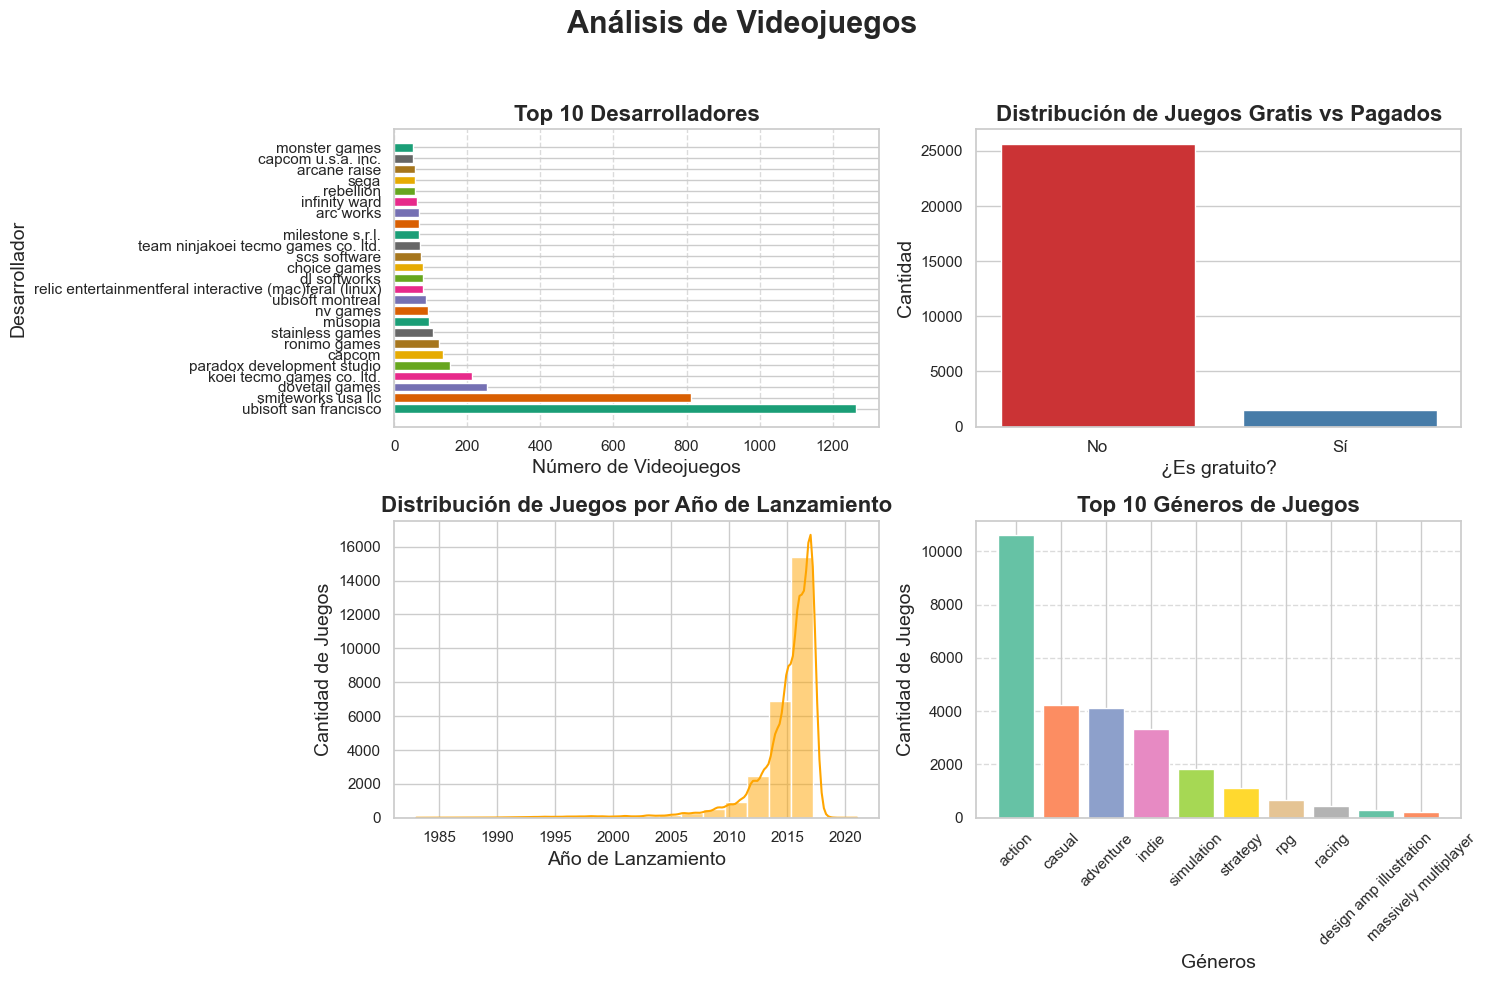

In [5]:
games.isnull().sum()
games.duplicated().sum()
games.dtypes
games.describe()
print(games.info())



sns.set(style='whitegrid')


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Videojuegos', fontsize=22, fontweight='bold')

# 1. Top 10 Desarrolladores por Número de Videojuegos (Gráfico de barras horizontal)
developer_counts = games['developer'].value_counts().nlargest(25)
axs[0, 0].barh(developer_counts.index, developer_counts.values, color=sns.color_palette("Dark2", 25))
axs[0, 0].set_title('Top 10 Desarrolladores', fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel('Número de Videojuegos', fontsize=14)
axs[0, 0].set_ylabel('Desarrollador', fontsize=14)
axs[0, 0].tick_params(axis='y', rotation=0)  
axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)

# 2. Distribución de Juegos Gratis vs Pagados
sns.countplot(x='is_free', data=games, palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Juegos Gratis vs Pagados', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('¿Es gratuito?', fontsize=14)
axs[0, 1].set_ylabel('Cantidad', fontsize=14)
axs[0, 1].set_xticklabels(['No', 'Sí'], fontsize=12)

# 3. Distribución de Juegos por Año de Lanzamiento
sns.histplot(games['release_year'], bins=20, kde=True, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Juegos por Año de Lanzamiento', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('Año de Lanzamiento', fontsize=14)
axs[1, 0].set_ylabel('Cantidad de Juegos', fontsize=14)

# 4. Distribución de géneros de los juegos (Gráfico de barras vertical)
genre_counts = games['genre'].value_counts().head(10)
axs[1, 1].bar(genre_counts.index, genre_counts.values, color=sns.color_palette("Set2", 10))
axs[1, 1].set_title('Top 10 Géneros de Juegos', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('Géneros', fontsize=14)
axs[1, 1].set_ylabel('Cantidad de Juegos', fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)  
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()






### Análisis del dataset REVIEWS
**-Gráfico 1:** *Distribución del Análisis de Sentimiento*
Nos proporciona una idea general sobre la percepción de los usuarios respecto a los ítems reseñados.

**-Gráfico 2:** *Reseñas Recomendadas vs No Recomendadas*
Es útil para determinar si los usuarios tienden a recomendar el ítem después de usarlo o si, por el contrario, hay una mayor cantidad de reseñas que no recomiendan el producto.

**-Gráfico 3:** *Relación entre Sentimiento y Recomendaciones*
Este gráfico muestra la relación entre el análisis de sentimiento y si el usuario recomendó o no el ítem. Podemos ver cómo las reseñas positivas tienden a correlacionarse con más recomendaciones, mientras que las reseñas negativas probablemente incluyan menos recomendaciones.

**-Gráfico 4:** *Distribución de Reseñas por Usuario*
Es útil para identificar posibles patrones de usuarios activos y el volumen de reseñas que aportan. También puede ser útil para identificar a los "superusuarios" que escriben la mayor parte de las reseñas.

### **Conclusiones**
Este análisis permite identificar patrones importantes en las reseñas de los usuarios, como la proporción de reseñas positivas, la relación entre sentimiento y recomendación, y la actividad de los usuarios en términos de cuántas reseñas generan. Estos resultados pueden ayudar a tomar decisiones basadas en datos sobre cómo gestionar y analizar las opiniones de los usuarios en tu plataforma o servicio.

In [6]:
reviews= pd.read_parquet(r"C:\Users\veram\OneDrive\Escritorio\proyecto octubre\Datos_parquet\data_review_user.parquet")
reviews.isnull().sum()
reviews.duplicated().sum()
reviews.dtypes
games.describe()
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49186 entries, 0 to 49185
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             49186 non-null  object
 1   item_id             49186 non-null  object
 2   year_posted         49186 non-null  object
 3   recommend           49186 non-null  bool  
 4   sentiment_analysis  49186 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 1.5+ MB
None


C:\Users\veram\AppData\Local\Temp\ipykernel_26952\387731392.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recommend', data=reviews, palette='Set2', ax=axs[0, 1])
C:\Users\veram\AppData\Local\Temp\ipykernel_26952\387731392.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(['No', 'Sí'])
C:\Users\veram\AppData\Local\Temp\ipykernel_26952\387731392.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Malo', 'Regular', 'Bueno'])


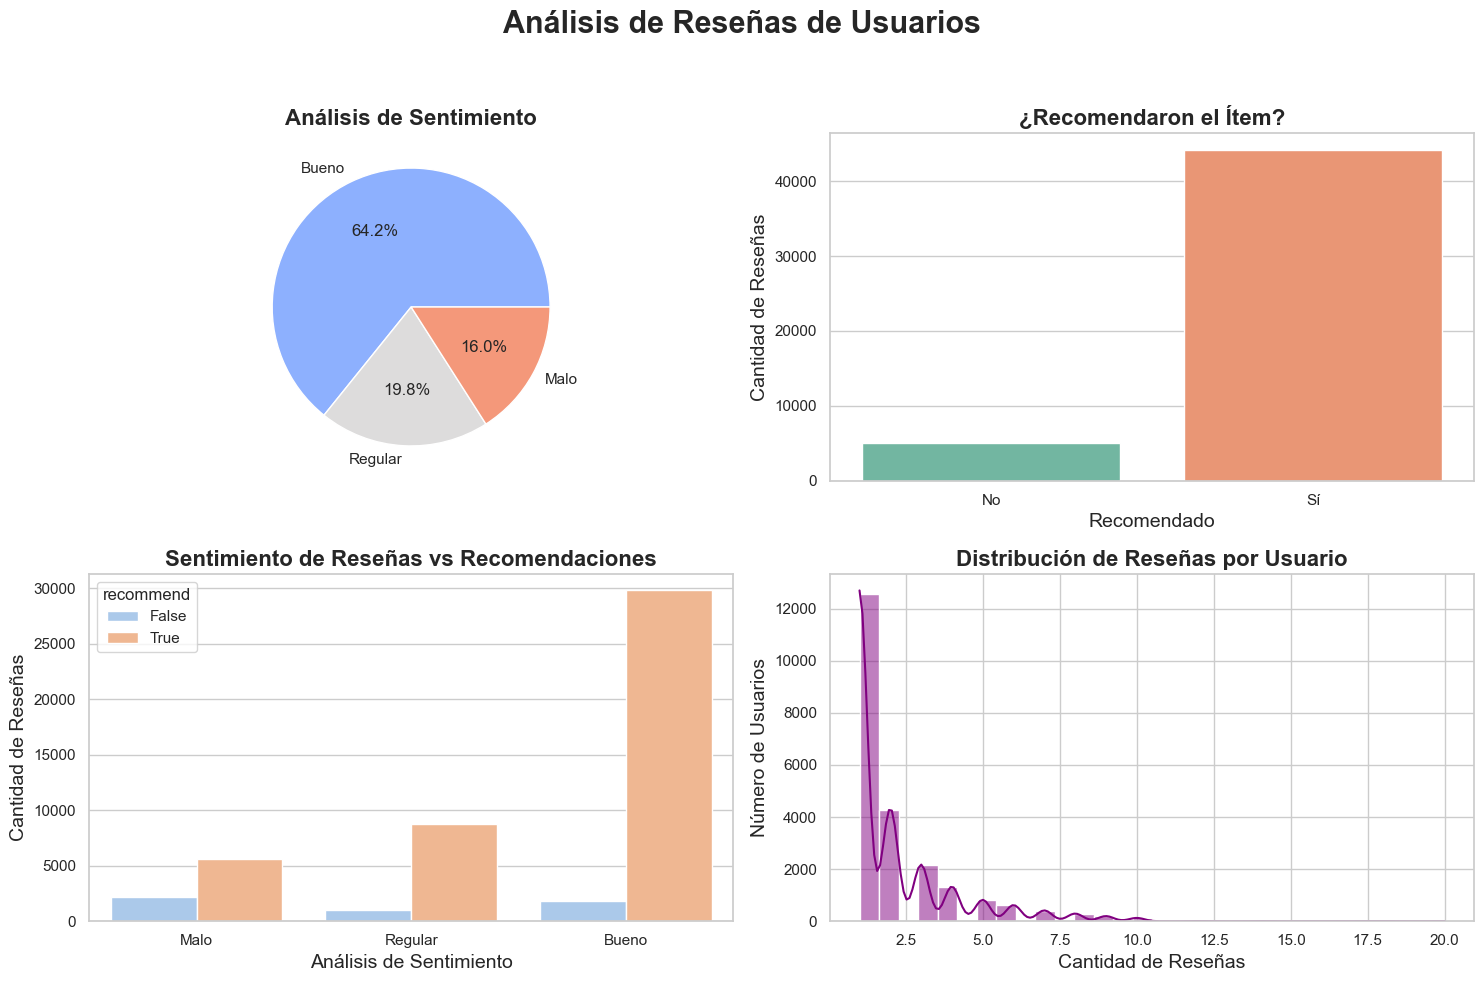

In [39]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Reseñas de Usuarios', fontsize=22, fontweight='bold')

# 1. Distribución del análisis de sentimiento 
sentiment_counts = reviews['sentiment_analysis'].value_counts()
axs[0, 0].pie(sentiment_counts, labels=['Bueno', 'Regular', 'Malo'], autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 3))
axs[0, 0].set_title('Análisis de Sentimiento', fontsize=16, fontweight='bold')

# 2. Reseñas recomendadas vs no recomendadas 
sns.countplot(x='recommend', data=reviews, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('¿Recomendaron el Ítem?', fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel('Recomendado', fontsize=14)
axs[0, 1].set_ylabel('Cantidad de Reseñas', fontsize=14)
axs[0, 1].set_xticklabels(['No', 'Sí'])

# 3. Relación entre Sentimiento y Recomendaciones
sns.countplot(x='sentiment_analysis', hue='recommend', data=reviews, palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Sentimiento de Reseñas vs Recomendaciones', fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel('Análisis de Sentimiento', fontsize=14)
axs[1, 0].set_ylabel('Cantidad de Reseñas', fontsize=14)
axs[1, 0].set_xticklabels(['Malo', 'Regular', 'Bueno'])


# 4. Distribución de reseñas por usuario 
user_review_counts = reviews['user_id'].value_counts()
sns.histplot(user_review_counts, bins=30, kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Reseñas por Usuario', fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel('Cantidad de Reseñas', fontsize=14)
axs[1, 1].set_ylabel('Número de Usuarios', fontsize=14)



import pandas as pd
import matplotlib.pyplot as plt



# Ordenar por el número de recomendaciones y seleccionar los 25 más recomendados
top_25_games = reviews[['app_name', 'recommend']].sort_values(by='recommendations_count', ascending=False).head(25)

# Crear el gráfico
plt.figure(figsize=(10, 8))
plt.barh(top_25_games['game_title'], top_25_games['recommendations_count'], color='skyblue')
plt.xlabel('Cantidad de Recomendaciones', fontsize=14)
plt.ylabel('Videojuegos', fontsize=14)
plt.title('Top 25 Videojuegos Más Recomendados', fontsize=18, fontweight='bold')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el videojuego con más recomendaciones esté en la parte superior
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


# Análisis del dataset **ITEMS**
**-Gráfico 1:** *Top 10 Usuarios con Más Tiempo de Juego*
Este gráfico muestra los usuarios que han acumulado la mayor cantidad de horas de juego. Nos permite identificar a los jugadores más activos y comprometidos, lo cual puede ser útil para analizar patrones de comportamiento entre los usuarios más dedicados.

**-Gráfico 2:** *Top 10 Ítems con Más Tiempo de Juego*
Aquí observamos cuáles son los ítems (juegos, contenidos descargables u otros) que han registrado más horas de uso. Este gráfico nos ofrece una visión clara de cuáles son los ítems más populares entre los usuarios, ayudando a identificar tendencias o preferencias de consumo dentro de la plataforma.

**Conclusiones**
El análisis del tiempo de juego entre los usuarios y los ítems permite extraer información valiosa sobre el nivel de compromiso y las preferencias de los jugadores. Los datos pueden ayudar a enfocar los esfuerzos en desarrollar más contenido relacionado con los ítems más jugados o realizar campañas de fidelización dirigidas a los usuarios más activos, maximizando la retención y satisfacción en la plataforma.








In [5]:
items= pd.read_parquet(r"C:\Users\veram\OneDrive\Escritorio\proyecto octubre\Datos_parquet\data_items.parquet")
items.isnull().sum()
items.duplicated().sum()
items.dtypes
items.describe()
print(items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246352 entries, 0 to 3246351
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   playtime_forever  int64 
dtypes: int64(1), object(2)
memory usage: 74.3+ MB
None


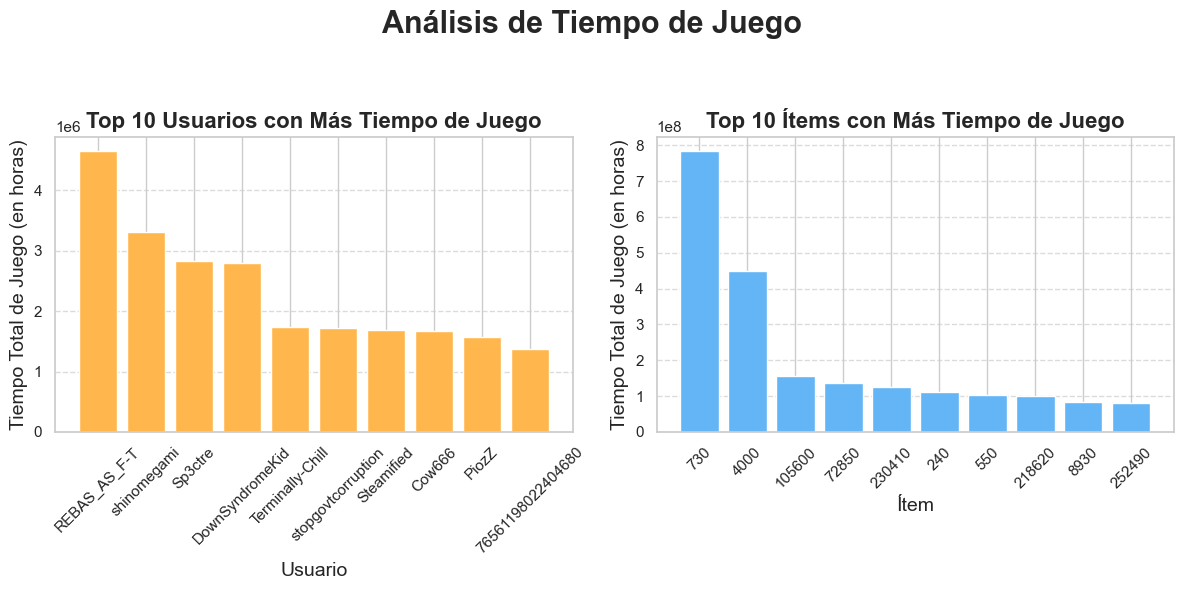

In [18]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Tamaño ajustado
fig.suptitle('Análisis de Tiempo de Juego', fontsize=22, fontweight='bold')

# 1. Top 10 Usuarios con Más Tiempo de Juego
if 'user_name' in items.columns:
    top_users = items.groupby('user_name')['playtime_forever'].sum().nlargest(10)
    user_labels = top_users.index  # Nombres de usuario
else:
    top_users = items.groupby('user_id')['playtime_forever'].sum().nlargest(10)
    user_labels = top_users.index.astype(str)  # IDs de usuario

axs[0].bar(user_labels, top_users.values, color='#FFB74D')  # Color personalizado (naranja suave)
axs[0].set_title('Top 10 Usuarios con Más Tiempo de Juego', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Usuario', fontsize=14)
axs[0].set_ylabel('Tiempo Total de Juego (en horas)', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Top 10 Ítems con Más Tiempo de Juego
if 'item_name' in items.columns:
    top_items = items.groupby('item_name')['playtime_forever'].sum().nlargest(10)
    item_labels = top_items.index 
else:
    top_items = items.groupby('item_id')['playtime_forever'].sum().nlargest(10)
    item_labels = top_items.index.astype(str)

axs[1].bar(item_labels, top_items.values, color='#64B5F6')  
axs[1].set_title('Top 10 Ítems con Más Tiempo de Juego', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Ítem', fontsize=14)
axs[1].set_ylabel('Tiempo Total de Juego (en horas)', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()




